# Connect Drive
- google drive를 colab과 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title Output { vertical-output: true }
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


실행 위치를 변경

In [0]:
%cd "/content/gdrive/My Drive/04_영상인식_copied/CH345"
!ls -al


/content/gdrive/My Drive/04_영상인식_copied/CH345
total 830
drwx------ 2 root root   4096 Jan 30 03:53 data
drwx------ 2 root root   4096 Jan 30 03:53 .ipynb_checkpoints
-rw------- 1 root root 840710 Jan 30 04:16 Keras_VGG16.ipynb


# Download Dataset
다음 코드를 실행하여 다운로드 받는다.

In [0]:
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz -P data
!ls -al data

--2019-01-30 04:33:00--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131740031 (126M) [application/x-tar]
Saving to: ‘data/101_ObjectCategories.tar.gz.1’

101_ObjectCategorie 100%[===================>] 125.64M  3.99MB/s    in 23s     

2019-01-30 04:33:23 (5.46 MB/s) - ‘data/101_ObjectCategories.tar.gz.1’ saved [131740031/131740031]

total 257305
-rw------- 1 root root 131740031 Jan 30 03:53 101_ObjectCategories.tar.gz
-rw------- 1 root root 131740031 Dec 12  2016 101_ObjectCategories.tar.gz.1


## Data preprocessing


- Google Drive에서 다운받은 101_ObjectCategories.tar.gz를 /content/CH345/data에 압축해제
- /content/CH345/data/101_ObjectCategories/train 폴더 생성 -> 101_ObjectCategories의 data를 train으로 move
- /content/CH345/data/101_ObjectCategories/validation 폴더 생성 -> train 데이터의 20% 를 validation 폴더로 move


In [0]:
#@title Output { vertical-output: true }
# data download

!P1=/content/CH345/data; \
if [ ! -d $P1/101_ObjectCategories ]; then \
  echo "start uncompress..."; \
  tar xfz $P1/101_ObjectCategories.tar.gz --exclude "*BACKGROUND*" -C $P1; \
fi

!P1=/content/CH345/data; \
if [ ! -d $P1/101_ObjectCategories/train ]; then \
  echo "create train directory ..."; \
  mv    $P1/101_ObjectCategories $P1/train; \
  mkdir -p $P1/101_ObjectCategories; \
  mv    $P1/train $P1/101_ObjectCategories/; \
fi

# validation data move
!P2=/content/CH345/data/101_ObjectCategories; \
if [ ! -d $P2/validation ]; then \
  echo "start move validation file ...." ; \
  for idx in $(ls -d $P2/train/*); do \
    P3=$P2/validation/`basename $idx`; \
    mkdir -p $P3; \
    FCNT=$(($(ls "$idx"|wc -l) * 20 / 100)); \
    for jdx in $(ls $idx/* | head -$FCNT); do \
      mv "$jdx" $P3 ; \
    done; \
  done; \
fi

create train directory ...
start move validation file ....
ls: cannot access '/content/CH345/data/101_ObjectCategories/train/*': No such file or directory


 - train, validation 폴더의 세부 정보 확인

In [0]:
#@title Output { vertical-output: true }
%env P1=/content/CH345/data
!ls -al $P1/101_ObjectCategories/


!echo
!ls $P1/101_ObjectCategories/train
!echo
!ls $P1/101_ObjectCategories/validation


env: P1=/content/CH345/data
total 8
drwx------ 103 root root 4096 Jan 24 06:34 train
drwx------ 103 root root 4096 Jan 24 06:34 validation

accordion     cougar_face      gerenuk	     metronome	 soccer_ball
airplanes     crab	       gramophone    minaret	 stapler
anchor	      crayfish	       grand_piano   Motorbikes  starfish
ant	      crocodile        hawksbill     nautilus	 stegosaurus
barrel	      crocodile_head   headphone     octopus	 stop_sign
bass	      cup	       hedgehog      okapi	 strawberry
beaver	      dalmatian        helicopter    pagoda	 sunflower
binocular     dollar_bill      ibis	     panda	 tick
bonsai	      dolphin	       inline_skate  pigeon	 trilobite
brain	      dragonfly        joshua_tree   pizza	 umbrella
brontosaurus  electric_guitar  kangaroo      platypus	 watch
buddha	      elephant	       ketch	     pyramid	 water_lilly
butterfly     emu	       lamp	     revolver	 wheelchair
camera	      euphonium        laptop	     rhino	 wild_cat
cannon	      ewer	    

# Predict (1)
- VGG16 모델을 이용한 예측하기
  - VGG16() : Keras에서 제공하는 미리 학습된 모델을 사용


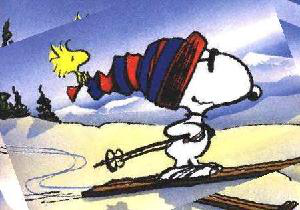

snowmobile (12.15%)


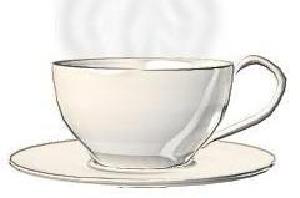

cup (79.63%)


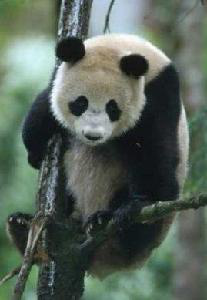

giant_panda (99.29%)


In [0]:
#@title Output { vertical-output: true }
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display # to display images
import numpy as np

# load the model
model = VGG16()

def _class() :
  image_size=224 

  validation_dir = '/content/CH345/data/101_ObjectCategories/validation'

  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Change the batchsize according to your system RAM
  val_batchsize = 10

  validation_generator = validation_datagen.flow_from_directory(
          validation_dir,
          target_size=(image_size, image_size),
          batch_size=val_batchsize,
          class_mode='categorical',
          shuffle=False)

  #class_num=len(validation_generator.class_indices)  
  keys = list(validation_generator.class_indices.keys())
  return keys

def _predict(filename) :
  # load an image from file
  image = load_img(filename)
  display(image)
  image = load_img(filename, target_size=(224, 224))

  # convert the image pixels to a numpy array
  image = img_to_array(image)

  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

  # prepare the image for the VGG model
  image = preprocess_input(image)

  # predict the probability across all output classes
  yhat = model.predict(image)

  if model.name == 'vgg16' :
    # convert the probabilities to class labels
    label = decode_predictions(yhat)

    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]

    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))
  else :
    idx=np.argmax(yhat[0])

    # print the classification
    print('%s (%.2f%%)' % (keys[idx], yhat[0][idx]*100))
  
if model.name != 'vgg16' :
  keys = _class() 
  
_file = ('/content/CH345/data/101_ObjectCategories/validation/snoopy/image_0001.jpg'
        ,'/content/CH345/data/101_ObjectCategories/validation/cup/image_0001.jpg'
        ,'/content/CH345/data/101_ObjectCategories/validation/panda/image_0001.jpg')

  
for _idx in _file :
  _predict(_idx)  

# Retrain (1)
 - Download한 Calteck 101 Dataset으로 학습
 
## ImageDataGenerator 구성
- Keras에서 제공하는 ImageDataGenerator를 사용하여 train, validation 폴더의 이미지를 읽을 수 있다.
- train, validation 폴더를 위해 각각의 다른 ImageDataGenerator를 사용
  - train_generator
  - validation_generator

In [0]:
#@title Output { vertical-output: true }
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/CH345/data/101_ObjectCategories/train'
validation_dir = '/content/CH345/data/101_ObjectCategories/validation'
image_size = 224

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

#print(train_generator.classes)
#len(train_generator.class_indices)
class_num=len(train_generator.class_indices)

Using TensorFlow backend.


Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


## Create a new model
 - pretrain한 VGG16 모델을 사용
 - 새로운 모델의 앞부분은 VGG16의 Layer로 구성하고 뒷부분은 Fully Connected Layer를 추가
 - VGG16의 Layer를 .trainable = False 처리하여 Freeze한다. -> VGG16의 Layer를 제외한 뒷부분의 Layer만 학습

In [0]:
#@title Output { vertical-output: true }
#--------------------------------------------
# Load the pre-trained model
#--------------------------------------------
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # get a new session

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_conv.summary()

#--------------------------------------------
# Freeze the required layers
#--------------------------------------------
# Freeze the layers 
for layer in vgg_conv.layers:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


#--------------------------------------------
# Create a new model
#--------------------------------------------
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

## Train the model
 - 학습한 모델을 저장할 checkpoints 폴더 생성

In [0]:
!mkdir -p /content/CH345/data/checkpoints

 - model.save()
   -  /content/CH345/data/checkpoints/small_last4.h5

In [0]:
#@title Output { vertical-output: true }
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('/content/CH345/data/checkpoints/small_last4.h5')

Epoch 1/10
140/139 [==============================] - 157s 1s/step - loss: 2.9774 - acc: 0.3788 - val_loss: 1.6687 - val_acc: 0.6018
Epoch 2/10
140/139 [==============================] - 141s 1s/step - loss: 1.8705 - acc: 0.5649 - val_loss: 1.0933 - val_acc: 0.7245
Epoch 3/10
140/139 [==============================] - 143s 1s/step - loss: 1.4603 - acc: 0.6440 - val_loss: 0.8820 - val_acc: 0.7847
Epoch 4/10
140/139 [==============================] - 141s 1s/step - loss: 1.2343 - acc: 0.6914 - val_loss: 0.7290 - val_acc: 0.8071
Epoch 5/10
140/139 [==============================] - 141s 1s/step - loss: 1.0215 - acc: 0.7302 - val_loss: 0.5939 - val_acc: 0.8437
Epoch 6/10
140/139 [==============================] - 140s 997ms/step - loss: 0.9707 - acc: 0.7457 - val_loss: 0.5359 - val_acc: 0.8590
Epoch 7/10
140/139 [==============================] - 140s 1s/step - loss: 0.8612 - acc: 0.7672 - val_loss: 0.5035 - val_acc: 0.8625
Epoch 8/10
140/139 [==============================] - 139s 995ms/s

 - h5파일(학습한 모델)의 용량 확인

In [0]:
#@title Output { vertical-output: true }
!du -h /content/CH345/data/checkpoints/small_last4.h5

253M	/content/CH345/data/checkpoints/small_last4.h5


## Check Performance for Retrain (1)
 - accuracy와 loss의 그래프를 확인

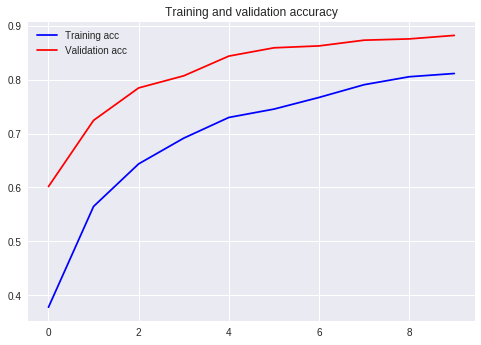

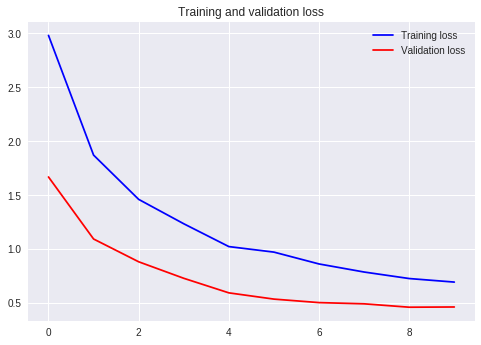

In [0]:
#@title Output { vertical-output: true }
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Retrain (2)
 - Fully Connected layer만 학습한 weight 파일로 전체 Layer를 학습한다.

In [0]:
#@title Output { vertical-output: true }
#--------------------------------------------
# Load the pre-trained model
#--------------------------------------------
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # get a new session

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


#--------------------------------------------
# Freeze the required layers
#--------------------------------------------
# Freeze the layers 
for layer in vgg_conv.layers:
    layer.trainable = True
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


#--------------------------------------------
# Create a new model
#--------------------------------------------
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

model.load_weights('/content/CH345/data/checkpoints/small_last4.h5')

 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7fa39aa81828> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa81940> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa81668> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa39aa99860> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa996d8> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa4b160> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa39aa65400> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa65278> True
<keras.layers.convolutional.Conv2D object at 0x7fa39a9ff630> True
<keras.layers.convolutional.Conv2D object at 0x7fa39aa171d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa3968a8400> True
<keras.layers.convolutional.Conv2D object at 0x7fa3968a8278> True
<keras.layers.convolutional.Conv2D object at 0x7fa3968c15f8> True
<keras.layers.convolutional.Conv2D object at 0x7fa396859198> True
<keras.layers.pooling.MaxPooling2D object at 0x7fa39688d208> True
<keras.l

## Train the model

In [0]:
%rm -rf /content/CH345/data/checkpoints/small_last5.h5

 - model.save()
  - /content/CH345/data/checkpoints/small_last5.h5

In [0]:
#@title Output { vertical-output: true }
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('/content/CH345/data/checkpoints/small_last5.h5')

Epoch 1/3
140/139 [==============================] - 144s 1s/step - loss: 0.6470 - acc: 0.8240 - val_loss: 0.4559 - val_acc: 0.8726
Epoch 2/3
140/139 [==============================] - 136s 974ms/step - loss: 0.6090 - acc: 0.8299 - val_loss: 0.4356 - val_acc: 0.8749
Epoch 3/3
140/139 [==============================] - 137s 976ms/step - loss: 0.5782 - acc: 0.8373 - val_loss: 0.4193 - val_acc: 0.8808


 - h5 파일(학습한 모델)의 용량 확인

In [0]:
#@title Output { vertical-output: true }
!du -h /content/CH345/data/checkpoints/small_last5.h5

253M	/content/CH345/data/checkpoints/small_last5.h5


## Check performance for Retrain (2)
 - accuracy와 loss의 그래프를 확인

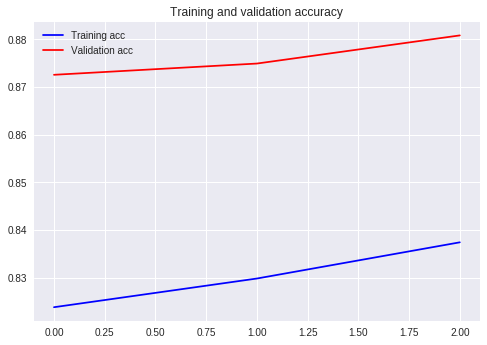

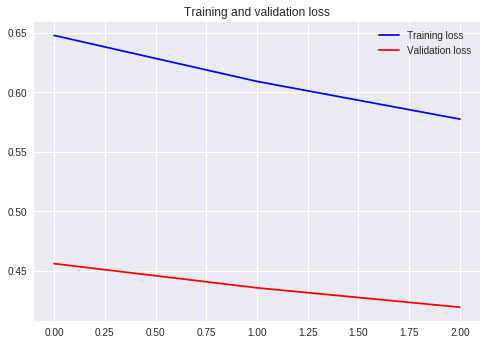

In [0]:
#@title Output { vertical-output: true }
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Predict (2)
 - Retrain한 모델을 이용하여 예측하기
  - load_model() : 학습한 모델 불러오기
    - /content/MD/data/checkpoints/small_last4.h5
    - /content/MD/data/checkpoints/small_last5.h5

Found 1695 images belonging to 101 classes.


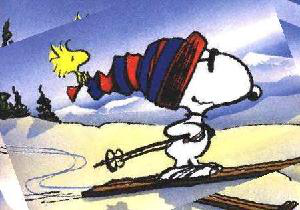

Motorbikes (100.00%)


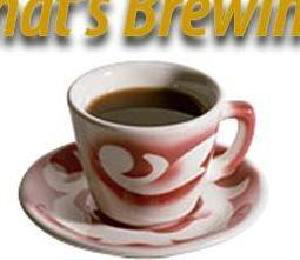

cup (100.00%)


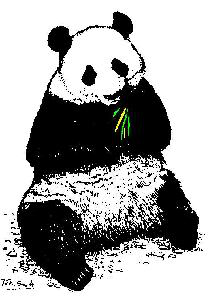

panda (100.00%)


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display # to display images
import numpy as np

model_path = '/content/CH345/data/checkpoints/small_last5.h5'

# load the model
#model = VGG16()
model = load_model(model_path)

def _class() :
  image_size=224 

  validation_dir = '/content/CH345/data/101_ObjectCategories/validation'

  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Change the batchsize according to your system RAM
  val_batchsize = 10

  validation_generator = validation_datagen.flow_from_directory(
          validation_dir,
          target_size=(image_size, image_size),
          batch_size=val_batchsize,
          class_mode='categorical',
          shuffle=False)

  #class_num=len(validation_generator.class_indices)  
  keys = list(validation_generator.class_indices.keys())
  return keys

def _predict(filename) :
  # load an image from file
  image = load_img(filename)
  display(image)
  image = load_img(filename, target_size=(224, 224))

  # convert the image pixels to a numpy array
  image = img_to_array(image)

  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

  # prepare the image for the VGG model
  image = preprocess_input(image)

  # predict the probability across all output classes
  yhat = model.predict(image)

  if model.name == 'vgg16' :
    # convert the probabilities to class labels
    label = decode_predictions(yhat)

    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]

    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))
  else :
    idx=np.argmax(yhat[0])

    # print the classification
    print('%s (%.2f%%)' % (keys[idx], yhat[0][idx]*100))
  
if model.name != 'vgg16' :
  keys = _class() 
  
_file = ('/content/CH345/data/101_ObjectCategories/validation/snoopy/image_0001.jpg'
        ,'/content/CH345/data/101_ObjectCategories/validation/cup/image_0002.jpg'
        ,'/content/CH345/data/101_ObjectCategories/validation/panda/image_0003.jpg')

  
for _idx in _file :
  _predict(_idx)  

# VGG16 Reference
- Code
 - http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb
 - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

- Keras document
 - https://keras.io/applications/
 
- Fine tune
 - https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
 - https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975